In [1]:
#Importing necessary library
import numpy as np
import os
import nltk
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random

In [2]:
#downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ujjaw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Function to find TF_IDF from list of reviews
def formTF_IDF(onlyReviewsList):
    #Set of unique words
    uniqueWords = set()
    for review in onlyReviewsList:
        for word in review.split(' '):
            if not word in stopwords.words('english'):
                uniqueWords.add(word)
    global D
    D = len(uniqueWords)
    len(uniqueWords)
    
    # TF Vector
    TF = []
    k=0
    for review in onlyReviewsList:
        k += 1
        thisReview = np.zeros((1,D))
        for counter, item in enumerate(uniqueWords):
            for word in review.split(' '):
                if word == item:
                    thisReview[0,counter] += 1
        if k==1:
            TF = thisReview
        else:
            TF = np.concatenate((TF,thisReview),axis = 0)
    
    #DF Vector
    global N
    N = TF.shape[0]
    DF = np.zeros((1,len(uniqueWords)))
    for i in range(D):
        c = 1
        for j in range(N):
            if (TF[j,i]>0):
                c += 1
        DF[0,i] = N/c
    logDF = np.log(DF)
    print(logDF)
    
    TF_IDF = np.multiply(TF,logDF)
    
    return TF_IDF

In [4]:
file = open('DataQ4.txt','r+')
reviews = file.read()
file.close()

In [5]:
reviewsList = reviews.split("\n")

In [6]:
onlyReviewsList = []
positiveNegativeList = []
for i in reviewsList:
    onlyReviewsList.append(i[0:len(i)-4].lower())
    positiveNegativeList.append(i[len(i)-1:])

In [7]:
onlyReviewsList = np.array(onlyReviewsList)
positiveNegativeList = np.array(positiveNegativeList)


In [8]:
TF_IDF = formTF_IDF(onlyReviewsList)

[[3.9633163  6.2146081  6.2146081  ... 5.80914299 6.2146081  6.2146081 ]]


In [9]:
# Reducing the dimension from len(uniqueWords) to 10 using PCA
temp = PCA(n_components = 10)
reducedTF_IDF = temp.fit_transform(TF_IDF)

In [10]:
# Initializing thew gaussian distributions
r1 = random.randint(0, N-1)
mean_1 = reducedTF_IDF[r1,:]
cov_1 = np.matmul(np.transpose(reducedTF_IDF - mean_1),reducedTF_IDF-mean_1)
alpha_1 = 0.5
prob_1 = np.zeros((N,))

r2 = random.randint(0, N-1)
mean_2 = reducedTF_IDF[r2,:]
cov_2 = np.matmul(np.transpose(reducedTF_IDF - mean_2),reducedTF_IDF-mean_2)
alpha_2 =  0.5
prob_2 = np.zeros((N,))

0th iteration
E-Step


  0%|          | 0/1000 [00:00<?, ?it/s]

M-Step


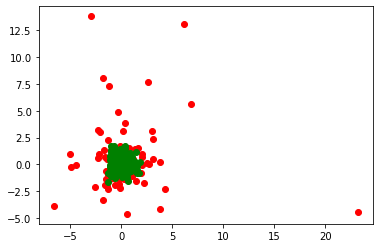

1th iteration
E-Step


  0%|          | 0/1000 [00:00<?, ?it/s]

M-Step


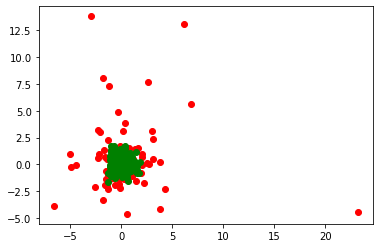

2th iteration
E-Step


  0%|          | 0/1000 [00:00<?, ?it/s]

M-Step


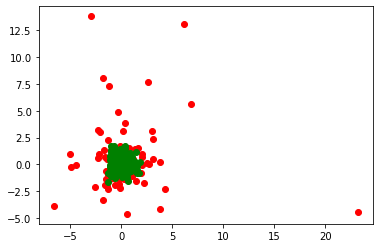

3th iteration
E-Step


  0%|          | 0/1000 [00:00<?, ?it/s]

M-Step


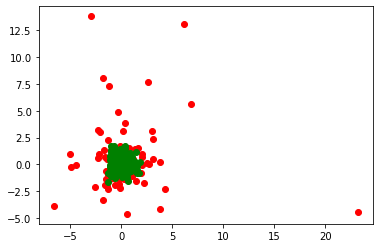

4th iteration
E-Step


  0%|          | 0/1000 [00:00<?, ?it/s]

M-Step


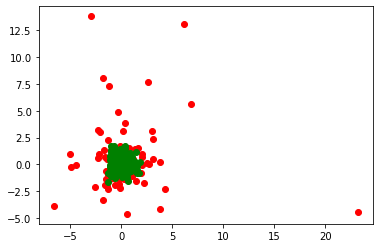

5th iteration
E-Step


  0%|          | 0/1000 [00:00<?, ?it/s]

M-Step


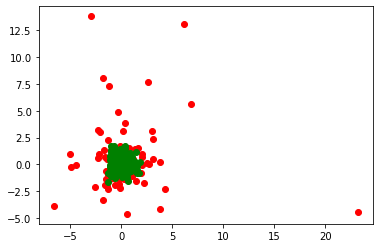

6th iteration
E-Step


  0%|          | 0/1000 [00:00<?, ?it/s]

M-Step


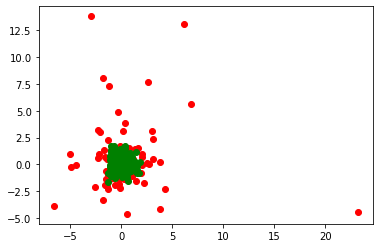

7th iteration
E-Step


  0%|          | 0/1000 [00:00<?, ?it/s]

M-Step


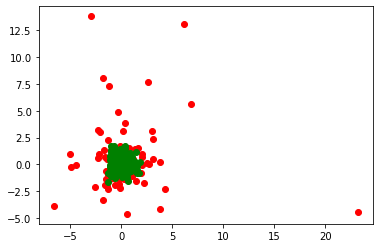

8th iteration
E-Step


  0%|          | 0/1000 [00:00<?, ?it/s]

M-Step


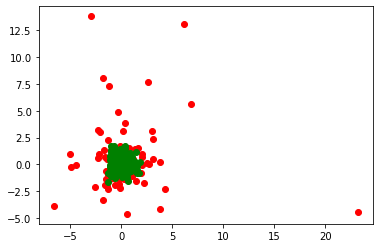

9th iteration
E-Step


  0%|          | 0/1000 [00:00<?, ?it/s]

M-Step


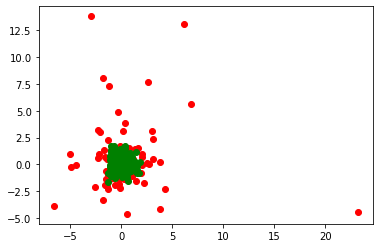

In [14]:
# Iterating through steps in EM Algorithm
k = 10
for i in (range(k)):
    print(f"{i}th iteration")
    print("E-Step")
    for i in tqdm(range(N)):
        num_1 = (alpha_1 * multivariate_normal.pdf(reducedTF_IDF[i,:], mean=mean_1, cov=cov_1,allow_singular = True))
        num_2 = (alpha_2 * multivariate_normal.pdf(reducedTF_IDF[i,:], mean=mean_2, cov=cov_2,allow_singular = True))
        denom = num_1 + num_2
        prob_1[i] = num_1/denom
        prob_2[i] = num_2/denom
        
        
    print("M-Step")
    
    #Finding updated means
    mean_1 = np.matmul(np.transpose(reducedTF_IDF),prob_1)/np.sum(prob_1)
    mean_2 = np.matmul(np.transpose(reducedTF_IDF),prob_2)/np.sum(prob_2)

    
    #Finding updates Covariance Matrices
    tempMatrix_1 = np.zeros((10,10))
    tempMatrix_2 = np.zeros((10,10))
    
    for i in (range(N)):
        x = (reducedTF_IDF[i,:] - mean_1).reshape(10,1)
        tempMatrix_1 += prob_1[i]* np.matmul(x,np.transpose(x))
        y = (reducedTF_IDF[i,:] - mean_2).reshape(10,1)
        tempMatrix_2 += prob_2[i] * np.matmul(y,np.transpose(y))
    
    cov_1 = np.diag(tempMatrix_1/np.sum(prob_1))
    cov_2 = np.diag(tempMatrix_2/np.sum(prob_2))
    
    
    # Finding updated Posteriors of two classes
    alpha_1 = np.mean(prob_1)
    alpha_2 = np.mean(prob_2) 
    
    #Plotting at each iteration using the first two dimesion
    plt.scatter(reducedTF_IDF[prob_1 > prob_2,8],reducedTF_IDF[prob_1 > prob_2,9],color= 'r')
    plt.scatter(reducedTF_IDF[prob_1 <= prob_2,8],reducedTF_IDF[prob_1 <= prob_2,9],color= 'g')
    plt.show()
    
    

In [12]:
compare = []
for i in range(N):
    if(prob_1[i]<prob_2[i]):
        compare.append(1)
    else:
        compare.append(0)

correctPrediction = 0
for i in range(N):
    if(compare[i] == int(positiveNegativeList[i])):
        correctPrediction += 1

accuracy = correctPrediction/N * 100        
print ("Accuracy = ",accuracy, "%")

Accuracy =  50.2 %
